In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

In [240]:
df = pd.read_csv('ai_resume_screening.csv')

In [241]:
df.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes


In [242]:
df.tail()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
29995,9,77.4,Bachelors,13,691,434,Yes
29996,5,77.8,Bachelors,9,473,149,No
29997,1,64.6,Bachelors,7,247,82,No
29998,7,94.8,Bachelors,12,584,409,Yes
29999,14,77.3,Masters,25,694,790,Yes


In [243]:
df.shape

(30000, 7)

In [244]:
df.columns

Index(['years_experience', 'skills_match_score', 'education_level',
       'project_count', 'resume_length', 'github_activity', 'shortlisted'],
      dtype='object')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_experience    30000 non-null  int64  
 1   skills_match_score  30000 non-null  float64
 2   education_level     30000 non-null  object 
 3   project_count       30000 non-null  int64  
 4   resume_length       30000 non-null  int64  
 5   github_activity     30000 non-null  int64  
 6   shortlisted         30000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB


In [246]:
df.describe()

,years_experience,skills_match_score,project_count,resume_length,github_activity
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,7.506567,73.682653,10.646267,572.584700,325.260667
std,4.624104,16.765909,4.634047,178.709918,159.951803
min,0.000000,0.500000,0.000000,150.000000,0.000000
25%,3.750000,62.100000,7.000000,441.000000,202.000000
50%,7.000000,74.300000,10.000000,574.000000,321.000000
75%,12.000000,86.500000,14.000000,709.000000,443.000000
max,15.000000,100.000000,25.000000,900.000000,842.000000


In [247]:
df.describe(include='object')

,education_level,shortlisted
count,30000,30000
unique,4,2
top,Bachelors,Yes
freq,13461,20966


In [248]:
df.isnull().sum()

years_experience      0
skills_match_score    0
education_level       0
project_count         0
resume_length         0
github_activity       0
shortlisted           0
dtype: int64

In [249]:
df.duplicated().sum()

0

In [250]:
num_cols = df.select_dtypes(include=['int64','float64'])
num_cols

,years_experience,skills_match_score,project_count,resume_length,github_activity
0,6,84.7,7,234,158
1,3,59.1,5,502,77
2,12,100.0,12,753,381
3,14,66.8,8,529,407
4,10,99.6,10,754,331
...,...,...,...,...,...
29995,9,77.4,13,691,434
29996,5,77.8,9,473,149
29997,1,64.6,7,247,82
29998,7,94.8,12,584,409


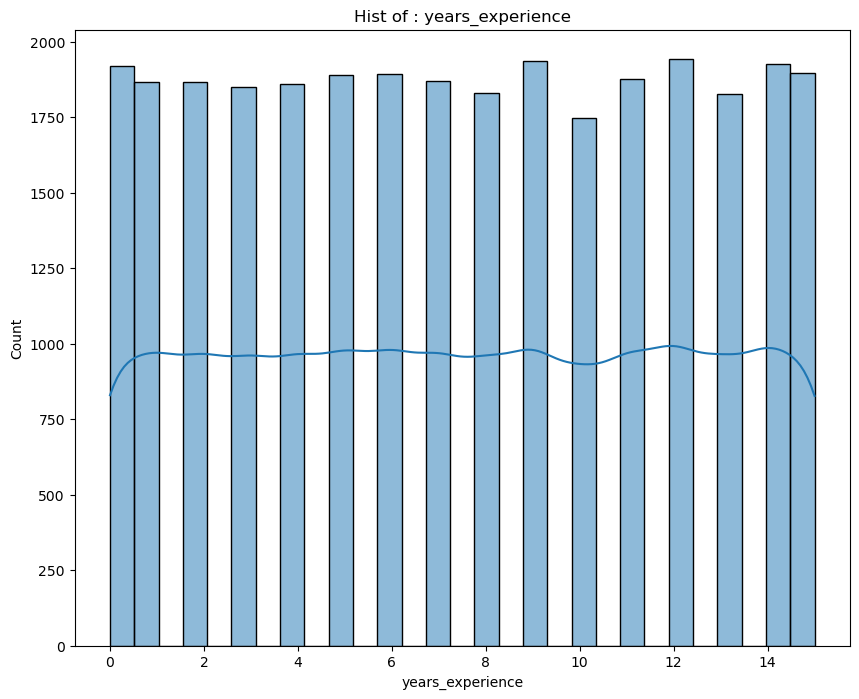

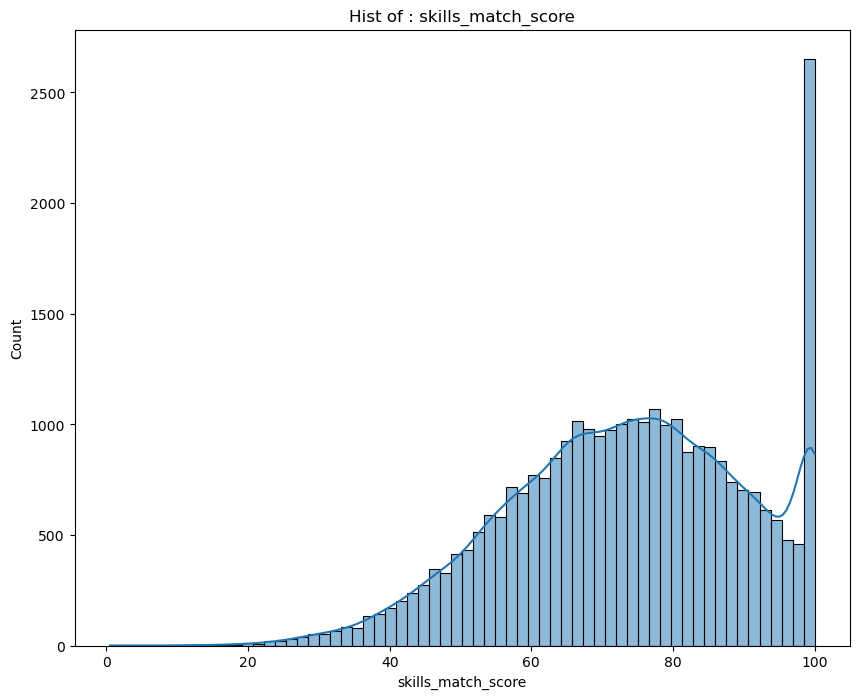

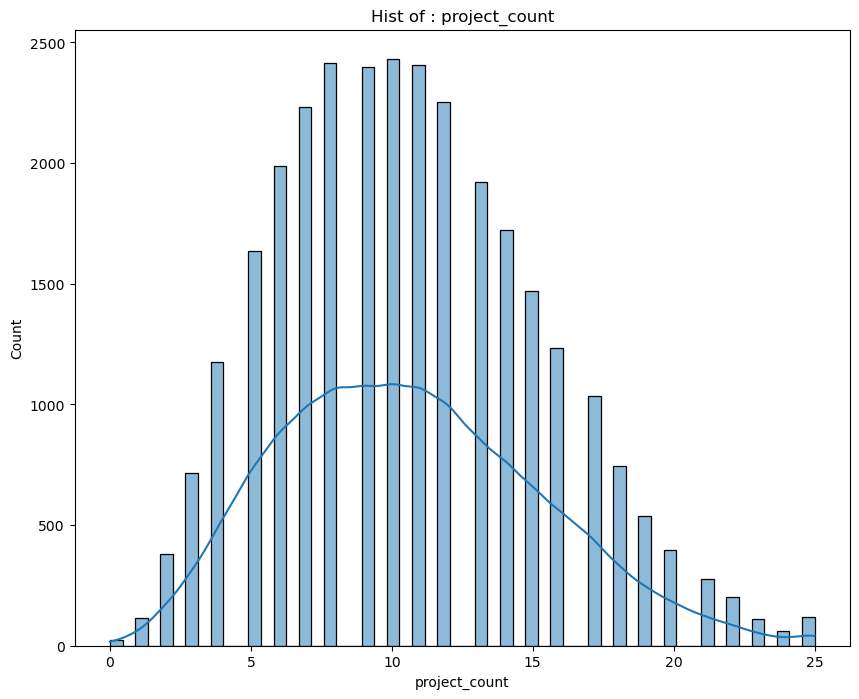

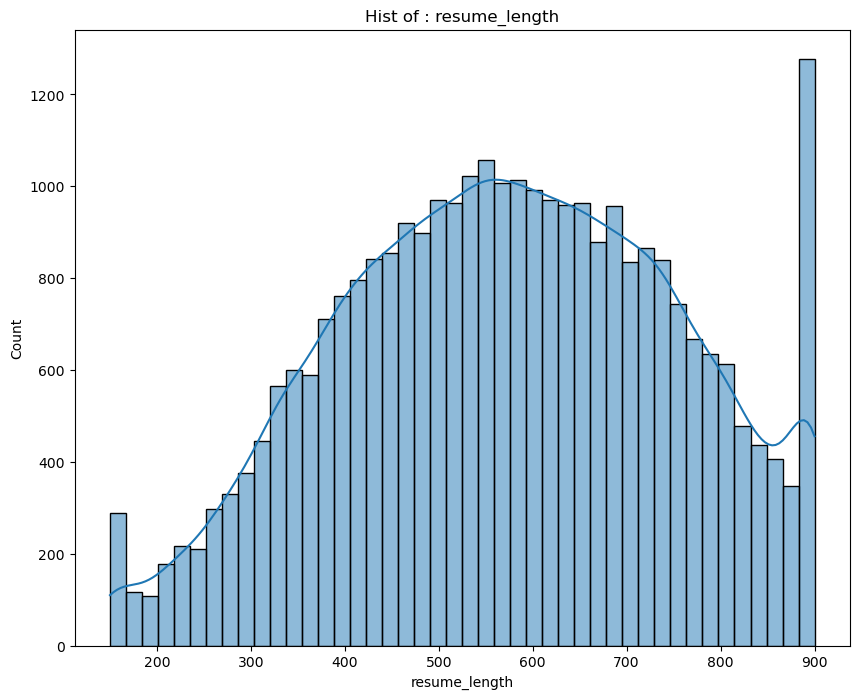

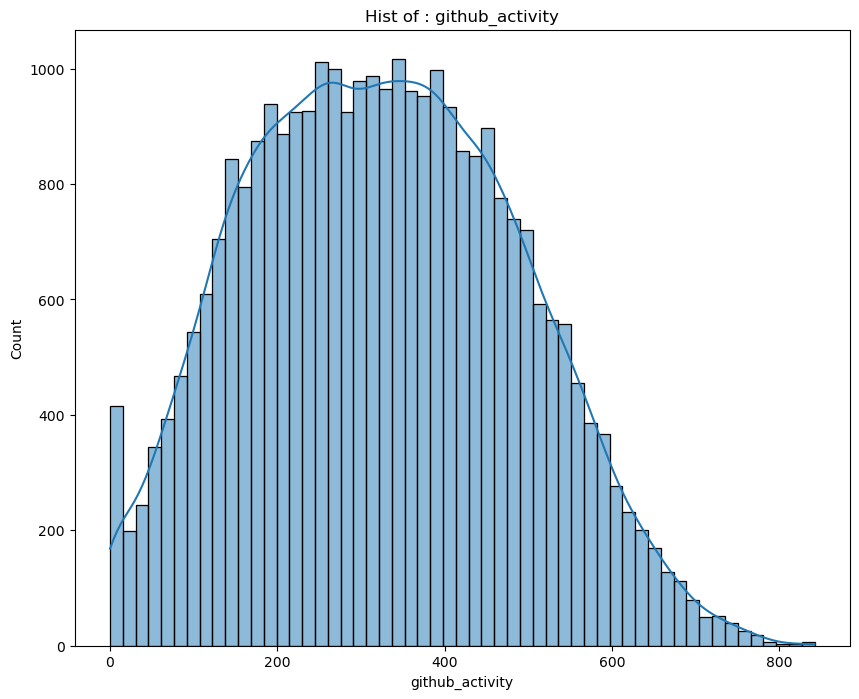

In [251]:
for i in num_cols:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=True)
    plt.title(f'Hist of : {i}')
    plt.show()

In [252]:
df['education_level'].value_counts()

education_level
Bachelors      13461
Masters        10524
PhD             3024
High School     2991
Name: count, dtype: int64

<Axes: xlabel='education_level'>

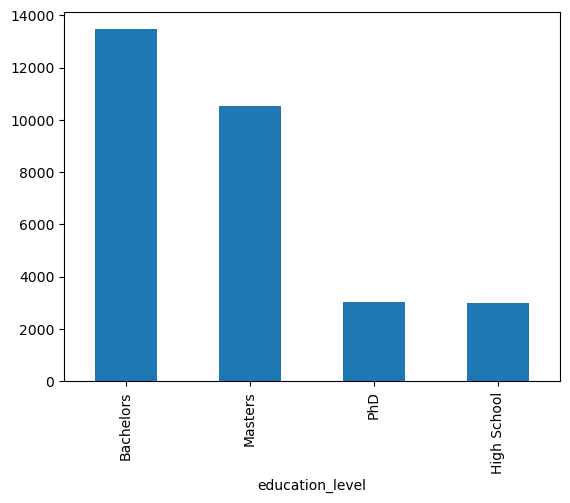

In [253]:
df['education_level'].value_counts().plot(kind='bar')

In [254]:
df['shortlisted'].value_counts()

shortlisted
Yes    20966
No      9034
Name: count, dtype: int64

<Axes: xlabel='shortlisted'>

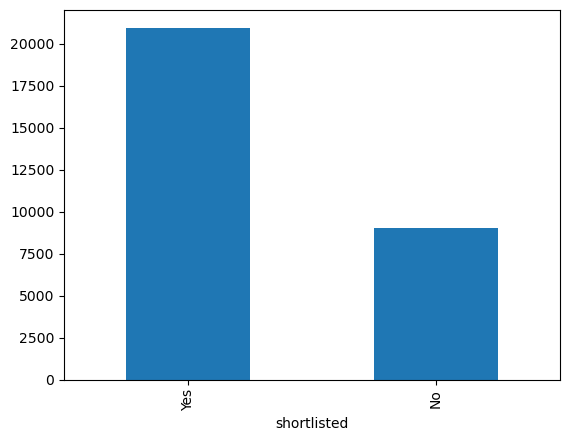

In [255]:
df['shortlisted'].value_counts().plot(kind='bar')

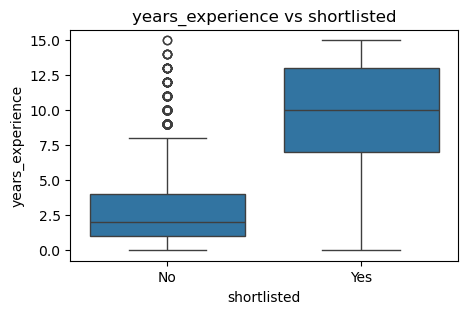

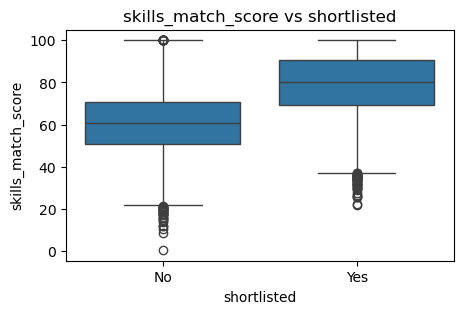

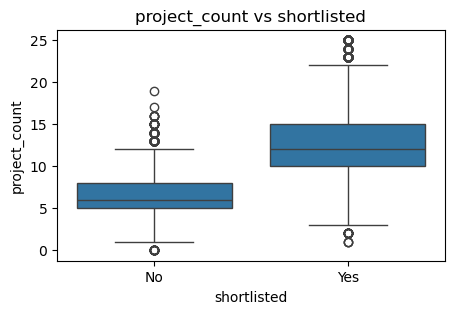

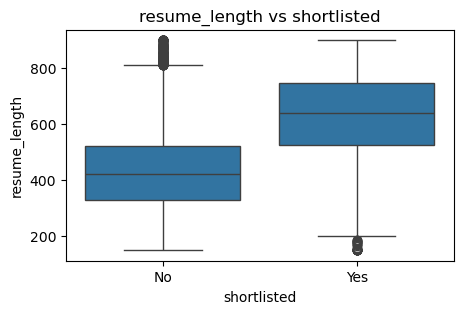

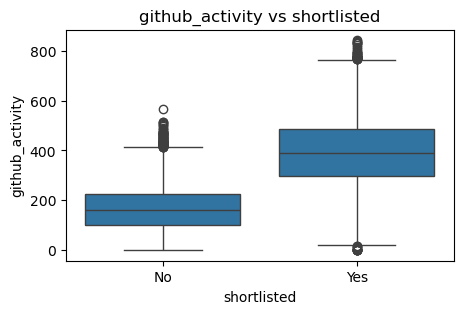

In [256]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='shortlisted', y=col, data=df)
    plt.title(f'{col} vs shortlisted')
    plt.show()

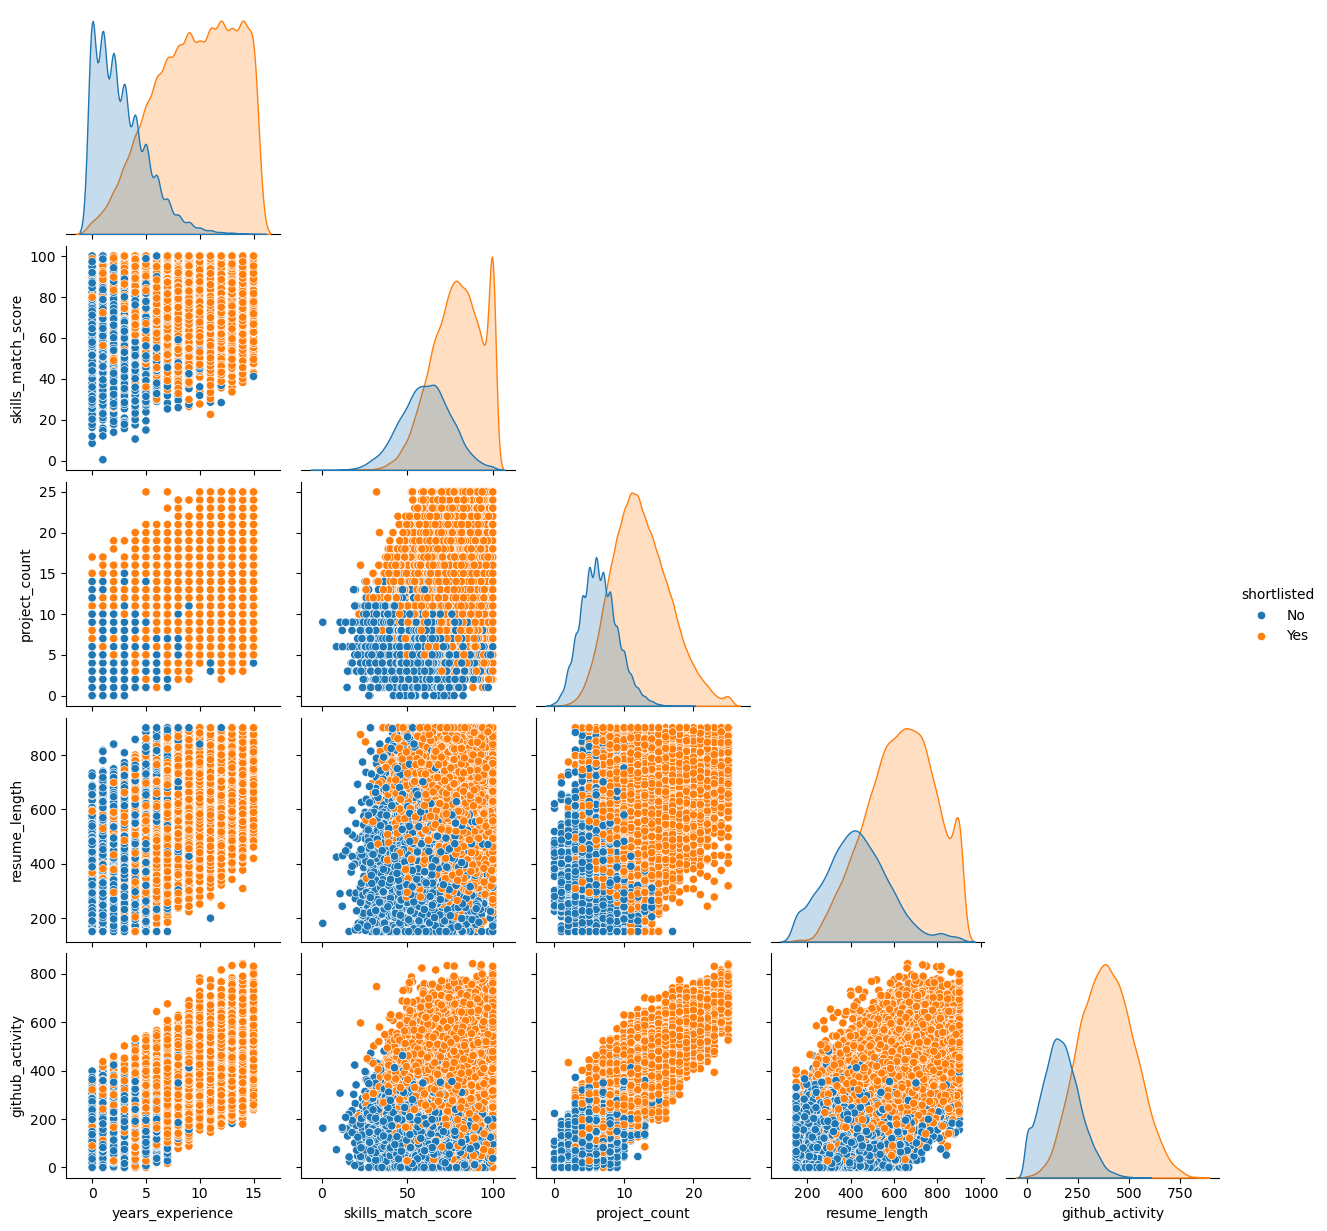

In [257]:
important_features = df.columns
sns.pairplot(
    df[important_features],
    hue="shortlisted",
    diag_kind="kde",
    corner=True
)
plt.show()

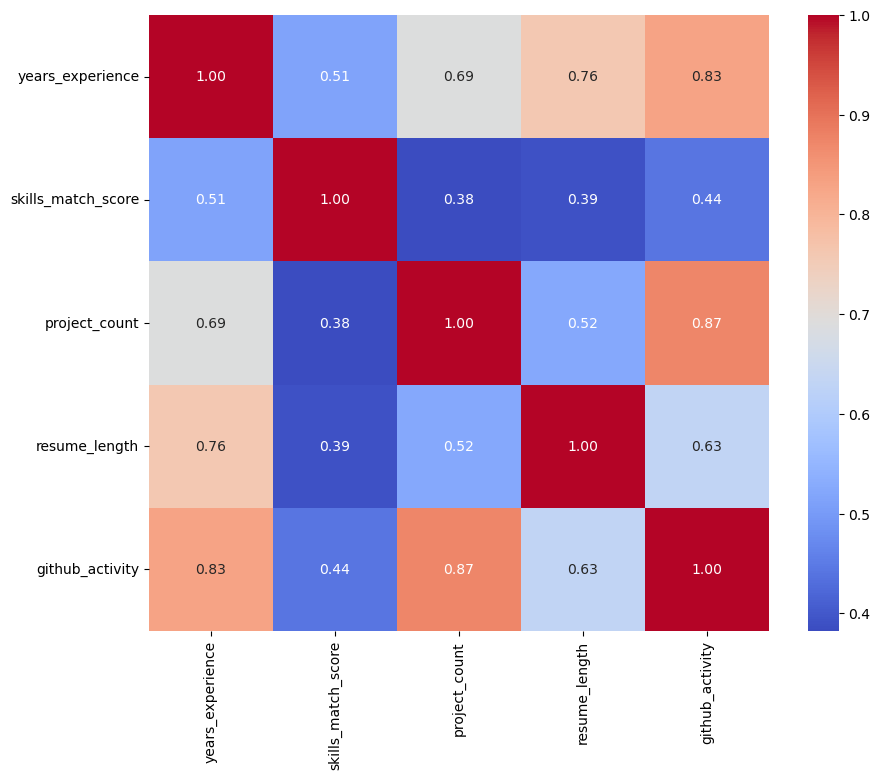

In [258]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),fmt='.2f',annot=True,cmap='coolwarm')
plt.show()

In [259]:
X = df.drop('shortlisted',axis=1)
y = df['shortlisted']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [261]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()


In [262]:
ord_cols = ['education_level']

In [263]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('ord', OrdinalEncoder(
            categories=[['High School', 'Bachelors', 'Masters','PhD']]
        ), ord_cols)
    ]
)


In [264]:
models = {
    'LogisticRegression': (
        LogisticRegression(max_iter=2000),
        {"classifier__C":[0.01,0.1,1,10]}
    ),

    'DecisionTreeClassifier': (
        DecisionTreeClassifier(random_state=42),
        {"classifier__max_depth":[None,5,10,15,20]}
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.05, 0.1]
        }
    ),

    "SVM": (
        SVC(probability=True),
        {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {"classifier__n_neighbors": [3, 5, 7]}
    )
}


In [265]:
results = []

for name, (model, params) in models.items():

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    yes_index = list(best_model.classes_).index('Yes')
    y_prob = best_model.predict_proba(X_test)[:, yes_index]

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='Yes'),
        "Recall": recall_score(y_test, y_pred, pos_label='Yes'),
        "F1-score": f1_score(y_test, y_pred, pos_label='Yes'),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


In [266]:
results_df = (
    pd.DataFrame(results)
    .sort_values(by="F1-score", ascending=False)
    .reset_index(drop=True)
)

results_df


,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,SVM,"{'classifier__C': 1, 'classifier__kernel': 'rbf'}",0.907000,0.926343,0.941808,0.934011,0.948454
1,Gradient Boosting,"{'classifier__learning_rate': 0.05, 'classifie...",0.904167,0.925447,0.938469,0.931912,0.966843
2,LogisticRegression,{'classifier__C': 0.1},0.904333,0.928081,0.935607,0.931829,0.964894
3,Random Forest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.901500,0.921188,0.939423,0.930216,0.964056
4,KNN,{'classifier__n_neighbors': 7},0.895667,0.921731,0.929645,0.925671,0.947989
5,DecisionTreeClassifier,{'classifier__max_depth': 5},0.886333,0.911220,0.927737,0.919404,0.945053
